# Modelling & Simulation: Lab 6 Mean-field modelling using ODEs

**Names**: Emmanuel Mukeh & Lucas Keijzer & Omar Nasri

**Student ID's**:  13461869 & 14041073 & 13976109

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [19]:
def euler_method(f, x0, t0, t_end, dt): 
    num_steps = int((t_end - t0) / dt) + 1
    t_values = np.linspace(t0, t_end, num_steps)
    x_values = np.zeros(num_steps)

    x = x0
    for i in range(num_steps):
        x_values[i] = x
        x += dt * f(x, t_values[i])

    return t_values, x_values


def runge_kutta_2nd(f, x0, t0, t_end, dt):
    h = dt
    t_values = [t0]
    x_values = [x0]

    while t_values[-1] < t_end:
        t = t_values[-1]
        x = x_values[-1]

        k1 = h * f(x, t)
        k2 = h * f(x + 0.5 * k1, t + 0.5 * h)


        x_new = x + k2
        t_new = t + h

        t_values.append(t_new)
        x_values.append(x_new)
    return np.array(t_values), np.array(x_values)

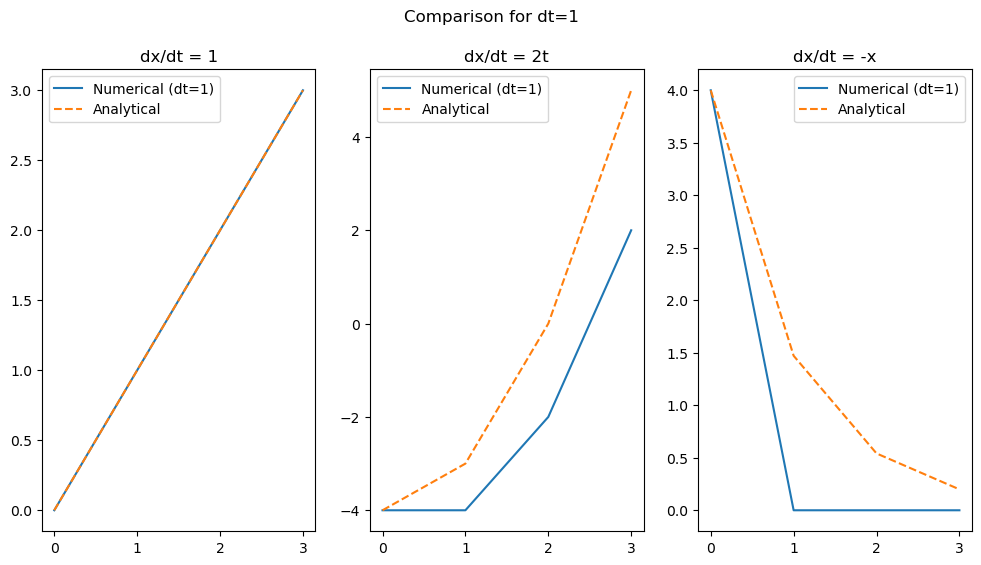

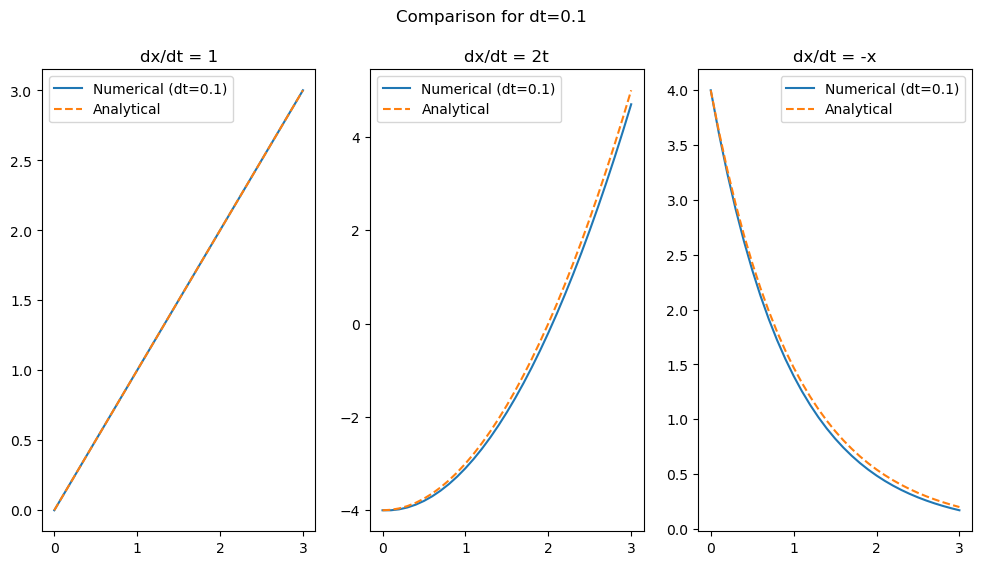

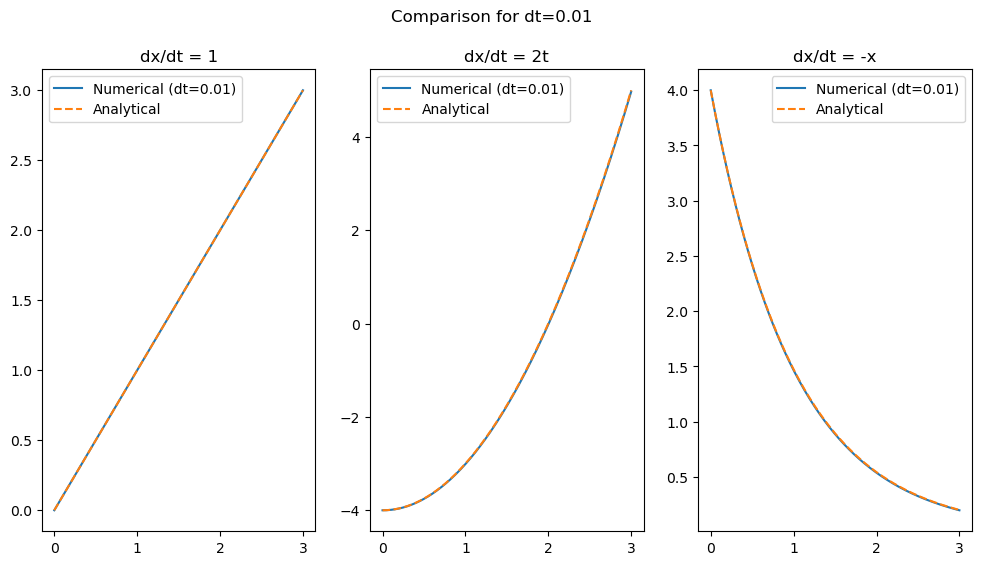

In [5]:
# ODEs
def f1(x, t):
    return 1

def f2(x, t):
    return 2 * t

def f3(x, t):
    return -x

# Analytical Solutions
def analytical_solution1(t):
    return t

def analytical_solution2(t):
    return t**2 - 4

def analytical_solution3(t):
    return 4 * np.exp(-t)

# Parameters
t0, t_end = 0, 3
x0_1, x0_2, x0_3 = 0, -4, 4
dt_values = [1, 0.1, 0.01]

# Plotting Euler method
for dt in dt_values:
    # Numerical solution
    t_numerical, x_numerical_1 = euler_method(f1, x0_1, t0, t_end, dt)
    _, x_numerical_2 = euler_method(f2, x0_2, t0, t_end, dt)
    _, x_numerical_3 = euler_method(f3, x0_3, t0, t_end, dt)

    # Analytical solution
    x_analytical_1 = analytical_solution1(t_numerical)
    x_analytical_2 = analytical_solution2(t_numerical)
    x_analytical_3 = analytical_solution3(t_numerical)

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.plot(t_numerical, x_numerical_1, label=f'Numerical (dt={dt})')
    plt.plot(t_numerical, x_analytical_1, label='Analytical', linestyle='dashed')
    plt.title('dx/dt = 1')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(t_numerical, x_numerical_2, label=f'Numerical (dt={dt})')
    plt.plot(t_numerical, x_analytical_2, label='Analytical', linestyle='dashed')
    plt.title('dx/dt = 2t')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(t_numerical, x_numerical_3, label=f'Numerical (dt={dt})')
    plt.plot(t_numerical, x_analytical_3, label='Analytical', linestyle='dashed')
    plt.title('dx/dt = -x')
    plt.legend()

    plt.suptitle(f'Comparison for dt={dt}')
    plt.show()


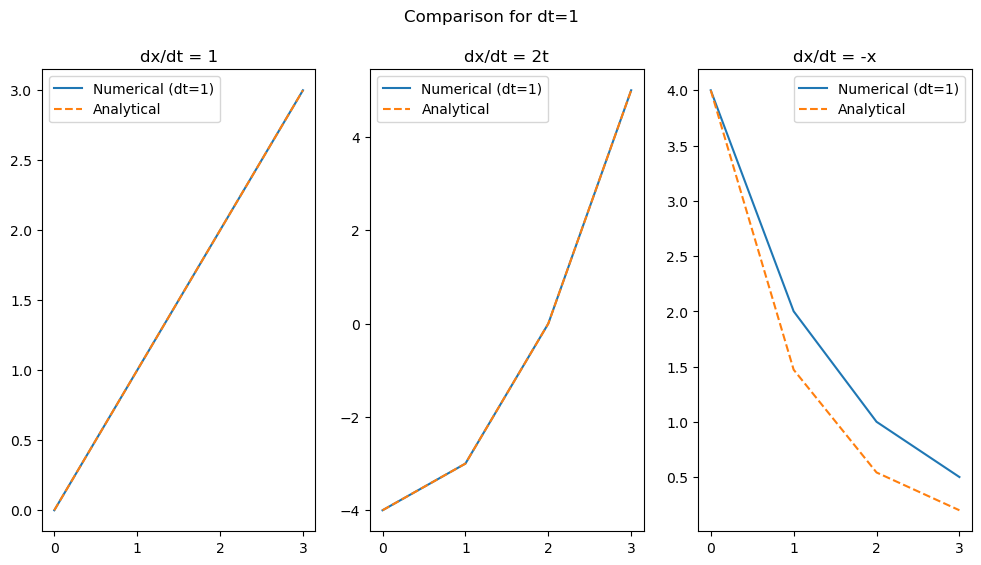

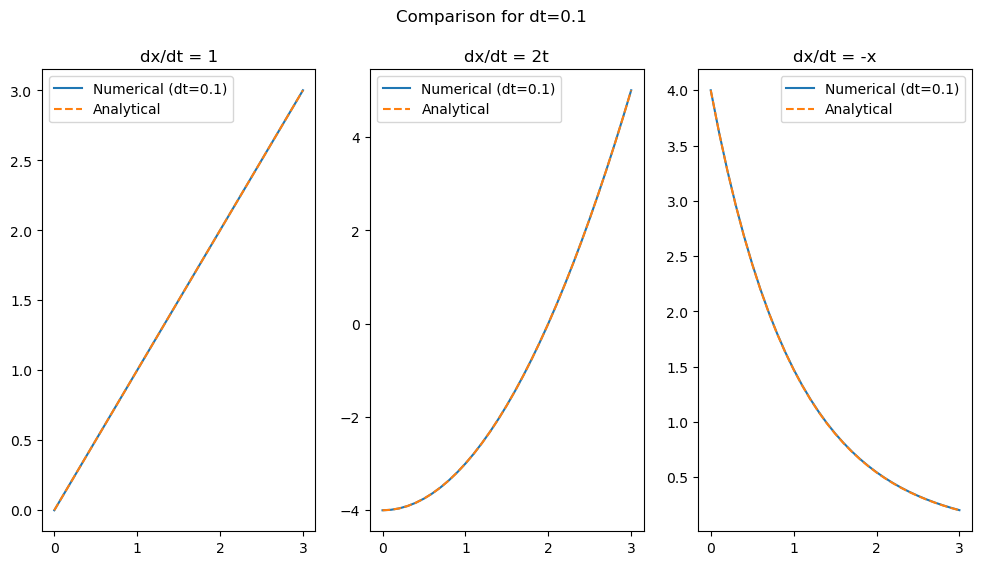

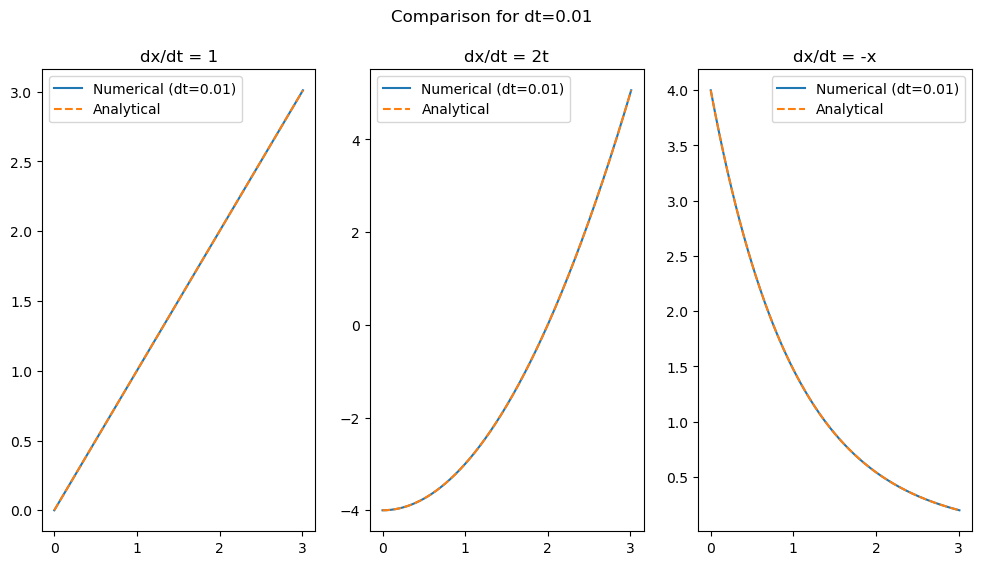

In [20]:
# Plotting Runge-Kutta Method
for dt in dt_values:
    # Numerical solution
    t_numerical, x_numerical_1 = runge_kutta_2nd(f1, x0_1, t0, t_end, dt)
    _, x_numerical_2 = runge_kutta_2nd(f2, x0_2, t0, t_end, dt)
    _, x_numerical_3 = runge_kutta_2nd(f3, x0_3, t0, t_end, dt)

    # Analytical solution
    x_analytical_1 = analytical_solution1(t_numerical)
    x_analytical_2 = analytical_solution2(t_numerical)
    x_analytical_3 = analytical_solution3(t_numerical)

    # Plotting
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.plot(t_numerical, x_numerical_1, label=f'Numerical (dt={dt})')
    plt.plot(t_numerical, x_analytical_1, label='Analytical', linestyle='dashed')
    plt.title('dx/dt = 1')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(t_numerical, x_numerical_2, label=f'Numerical (dt={dt})')
    plt.plot(t_numerical, x_analytical_2, label='Analytical', linestyle='dashed')
    plt.title('dx/dt = 2t')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(t_numerical, x_numerical_3, label=f'Numerical (dt={dt})')
    plt.plot(t_numerical, x_analytical_3, label='Analytical', linestyle='dashed')
    plt.title('dx/dt = -x')
    plt.legend()

    plt.suptitle(f'Comparison for dt={dt}')
    plt.show()

In [ ]:



def func(t,k,g):
    c1 = math.log(g)
    result = -math.exp(-k*t - c1)/k + g/k
    return result


t_values = np.linspace(0,5,100)
g_values = [2, 1, 2, 1]
k_values = [3, 1.5, 2, 1]

for g, k in zip(g_values, k_values):
    x_values = [func(t, k, g) for t in t_values]
    plt.plot(t_values, x_values, label=f'g={g}, k={k}')

plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.show()

